In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# Load data

In [2]:
data = pd.read_csv("../input/housesalesprediction/kc_house_data.csv", parse_dates=["date"])

In [3]:
data.shape

(21613, 21)

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Operations to be excuted**
1. Univariate Linear Regression
    * refers to regression analysis with only one independent variable X and a dependent variable/target y
2. Multivariate Linear Regression
    * refers to regression analysis with more than one independent variable X1, X2, X3....Xn and only one dependent varaible y

# Univariate linear regression

First, we create a dataframe of only one predictor and one target from our original data

In [5]:
univariate_data = data[['sqft_above', 'price']].copy()

In [6]:
univariate_data.head()

,sqft_above,price
0,1180,221900.0
1,2170,538000.0
2,770,180000.0
3,1050,604000.0
4,1680,510000.0


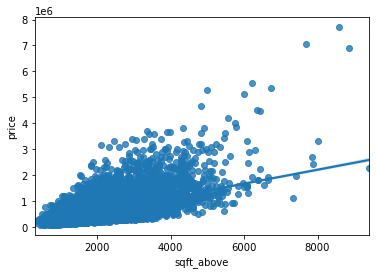

In [7]:
#now that we have our data, we check if a linear_model will fit the data best

ax = sns.regplot(x='sqft_above', y='price', data=univariate_data)

**Observation**
* we can see a clear linear relationship between the chosen features to model
* we can go ahead and apply the linear regression model to the dataset

Data preprocessing

In [8]:
#check for missing values and handle
import missingno as msn

print(f'description of dataset{univariate_data.describe()}\n\n')
print(f'info about dataset{univariate_data.info()}\n\n')
print(f'missing value count: {univariate_data.isna().sum()}')

description of dataset         sqft_above         price
count  21613.000000  2.161300e+04
mean    1788.390691  5.400881e+05
std      828.090978  3.671272e+05
min      290.000000  7.500000e+04
25%     1190.000000  3.219500e+05
50%     1560.000000  4.500000e+05
75%     2210.000000  6.450000e+05
max     9410.000000  7.700000e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft_above  21613 non-null  int64  
 1   price       21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB
info about datasetNone


missing value count: sqft_above    0
price         0
dtype: int64


**we have no missing value in our dataset, as seen below, we will visualize to ascertain this**

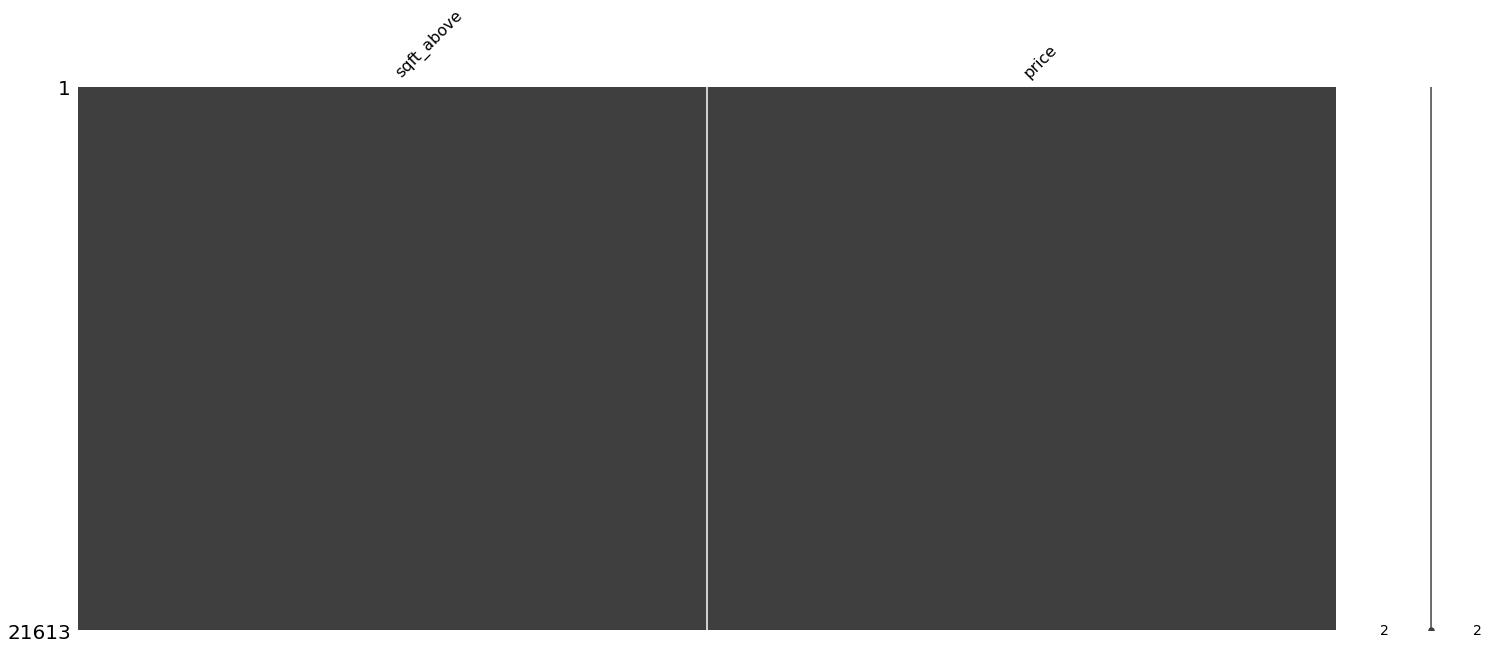

In [9]:
msn.matrix(univariate_data)

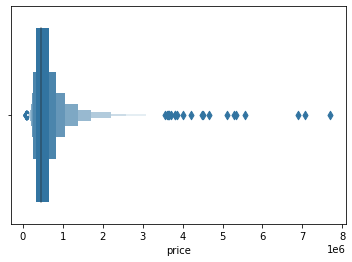

In [10]:
#check for outliers and treat

ax1 = sns.boxenplot(data=univariate_data, x='price')



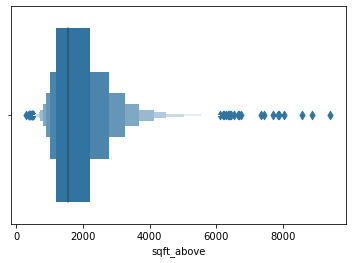

In [11]:
#check for outliers and treat

ax1 = sns.boxenplot(data=univariate_data, x='sqft_above')

we can clearly see the presence of outliers in the dataset, this will affect the accuracy of our model

In [12]:
#divide data into train and test set
from sklearn.model_selection import train_test_split
X = univariate_data.iloc[:, :-1].values
y = univariate_data.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
print(f'shape of X_train here is: {X_train.shape} while shape of y_train is: {y_train.shape}')

shape of X_train here is: (16209, 1) while shape of y_train is: (16209,)


**Model creation**

In [14]:
#import the linear regression algorithm from sklearn package
from sklearn.linear_model import LinearRegression

#create an object of the model
univariate_modelCV  = LinearRegression()

In [15]:
#fit the model
univariate_modelCV.fit(X_train, y_train)

LinearRegression()

# **Evaluation of model**

In [16]:
from sklearn import model_selection


kfold = model_selection.KFold(n_splits=2, random_state=7, shuffle=True)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(univariate_modelCV, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -191853.117 (1649.649)


In [17]:
univariate_modelCV.predict([[1430]])

array([445950.7373451])

In [65]:
#get model coefficient and intercepts
print(f'model intecepts are: {univariate_modelCV.intercept_}')
print(f'model coefficients are: {univariate_modelCV.coef_}')

model intecepts are: 541751.5648713678
model coefficients are: [222491.51326486]
